## Heart Attack Data Analysis and Prediction

#### Project summary
The aim of this project was to analyze a heart health dataset and build a model that can predict the chance of an individual experiencing a heart attack. By using different medical measurements and machine learning techniques, the goal was to create a reliable model for accurate predictions.

The dataset used in this analysis contained various medical measurements such as age, cholesterol levels, maximum heart rate, resting blood pressure, and other relevant factors that are known to be associated with heart health. Additionally, the dataset included information about whether each individual had experienced a heart attack or not, serving as the target variable.

To begin the analysis, the dataset was carefully examined and preprocessed. This involved checking for missing values, outliers and duplicates and performing any necessary data transformations. Exploratory data analysis techniques were employed to gain insights into the relationships between different variables and their potential impact on heart attack occurrences.

Next, a predictive model was trained using a suitable machine learning algorithm. Given the binary nature of the problem (heart attack or no heart attack), a classification algorithm was chosen. In this case, a Support Vector Machine (SVM) model was employed due to its ability to handle both numerical and categorical features effectively and relatively small dataset.

Due to the limited number of cases for categorical variables, it was not possible to split the dataset into training and test sets. The entire dataset was used for model training. However, I employed cross-validation (along with grid search) to identify the optimal hyperparameters and assess the performance of the model.

The model's accuracy is 84%, which means it predicts the right outcome or class label for 84% of the dataset. This model could be helpful in real-life situations, like predicting the likelihood of someone having a heart attack based on their medical information.

The dataset used in the project is available here: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### Dataset columns (14):

- age : age of the patient

- sex : sex of the patient

- exng: exercise induced angina (1 = yes; 0 = no)

- caa: number of major vessels (0-4)

- cp : chest pain type:

    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

- trtbps : resting blood pressure (mmHg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved
- slp: slope
- thall: Thalium Stress Test result ~ (0,3)

- output : heart attack (0 = no, 1 = yes)

#### Exploratory Data Analysis Summary:
- The dataset contains 303 records and 14 variables that provide medical/other information.
- No missing data
- One duplecate record (removed)
- variables types: discrete (age, resting blood pressure, cholestoral, maximum heart rate achieved); categorical (sex, chest_pain_type, fasting_blood_sugar>120, resting_electrocardiographic_results, exercise_induced_angina, n_major_vessels, Thalium_stress_test)
- The age distributions of individuals experiencing a heart attack and those who do not are different with a tendency for younger age groups (in their 40s-50s) being more prone to heart attacks.
- The distributions of cholesterol levels in individuals experiencing a heart attack and those who do not are largely similar, with a few outliers observed in the group experiencing a heart attack.
- Those having a heart attack tend to have higher maximun heart rate achieved compared to those who do not.
- People with sex=1 are more likely to have a heart attack than other group.
- There is no a significant difference in counts of heart attack among fasting blood sugar groups
- Outliers were identified in the dataset, specifically in the cholesterol and resting blood pressure variables, where higher values were observed compared to the majority. Conversely, lower values were found in the maximum heart rate achieved variable.
- The dataset consists of balanced classes, with nearly an equal number of individuals who had a heart attack and those who did not.

In [175]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [142]:
# CSV data will be loaded into the DataFrame
df = pd.read_csv("/Users/maria/Downloads/heart.csv")

### Exploratory Data Analysis

In [143]:
# print out a few rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [144]:
# rename columns with better names
df.rename(columns={'cp': 'chest_pain_type',
                   'trtbps': 'resting_blood_pressure', 
                   'chol':'cholesterol',
                   'fbs': 'fasting_blood_sugar>120',
                   'restecg': 'resting_electrocardiographic_results',
                   'thalachh': 'max_heart_rate',
                   'exng': 'exercise_induced_angina',
                   'caa': 'n_major_vessels',
                   'output': 'heart_attack',
                   'thall': 'Thalium_stress_test',
                   'slp': 'slope'}, inplace=True)

In [145]:
# display dimentions of the dataset
df.shape

(303, 14)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   sex                                   303 non-null    int64  
 2   chest_pain_type                       303 non-null    int64  
 3   resting_blood_pressure                303 non-null    int64  
 4   cholesterol                           303 non-null    int64  
 5   fasting_blood_sugar>120               303 non-null    int64  
 6   resting_electrocardiographic_results  303 non-null    int64  
 7   max_heart_rate                        303 non-null    int64  
 8   exercise_induced_angina               303 non-null    int64  
 9   oldpeak                               303 non-null    float64
 10  slope                                 303 non-null    int64  
 11  n_major_vessels    

In [147]:
# check for duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 14)


In [148]:
# print out the dublicate row
df[df.duplicated()]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar>120,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,slope,n_major_vessels,Thalium_stress_test,heart_attack
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [149]:
# remove the dublicate row
df = df.drop_duplicates()

In [150]:
df.shape

(302, 14)

#### Univariable Analysis

In [151]:
heart_attack_counts = df['heart_attack'].value_counts()
print(heart_attack_counts)

1    164
0    138
Name: heart_attack, dtype: int64


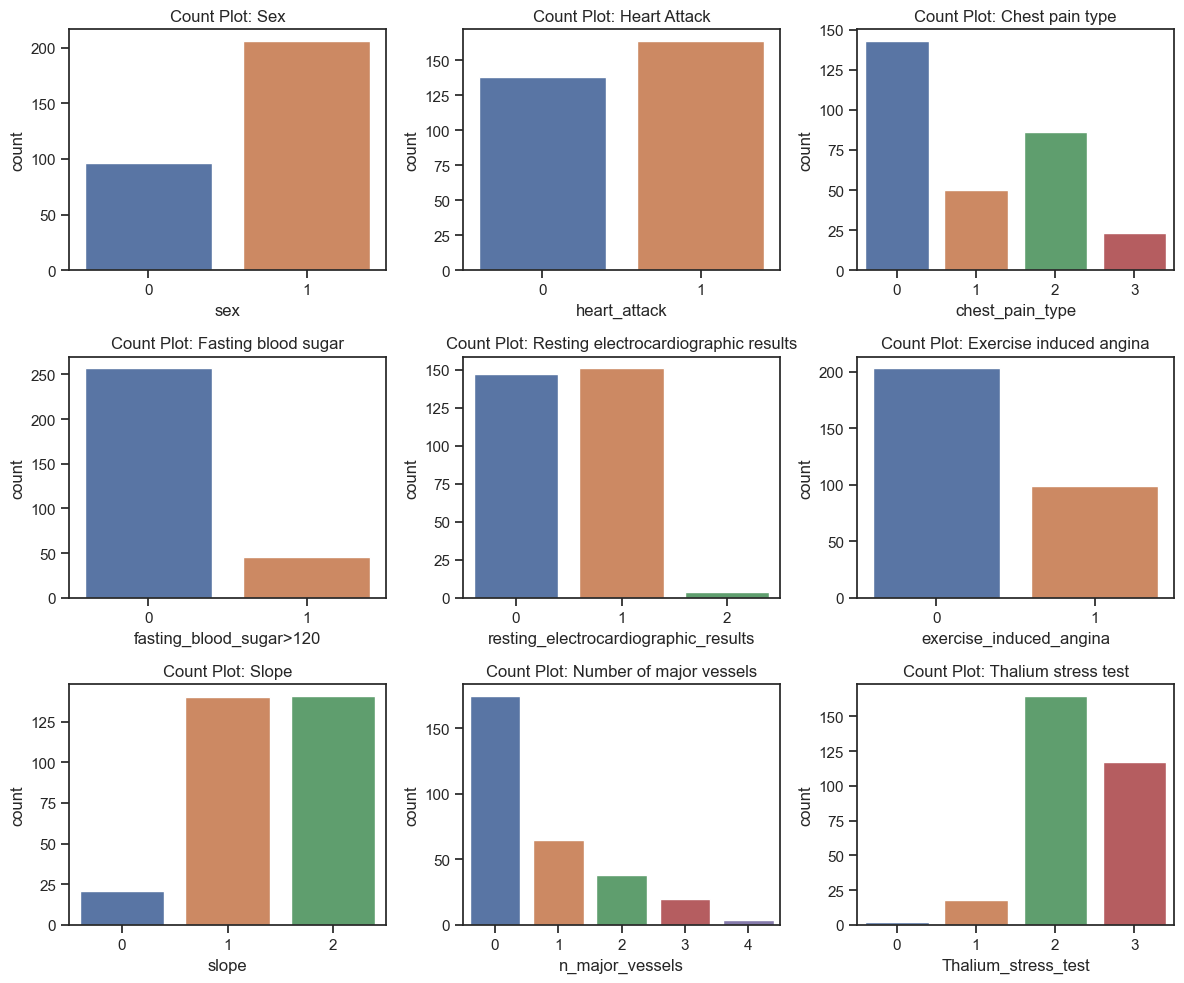

In [152]:
# Set the size of the figure
plt.figure(figsize=(12, 10))

# Create the first count plot for 'sex'
plt.subplot(331)
sns.countplot(data=df, x="sex")
plt.title("Count Plot: Sex")

# Create the second count plot for 'heart_attack'
plt.subplot(332)
sns.countplot(data=df, x="heart_attack")
plt.title("Count Plot: Heart Attack")

# Create the count plot for 'chest_pain_type'
plt.subplot(333)
sns.countplot(data=df, x="chest_pain_type")
plt.title("Count Plot: Chest pain type")

# Create the count plot for 'fasting_blood_sugar>120'
plt.subplot(334)
sns.countplot(data=df, x="fasting_blood_sugar>120")
plt.title("Count Plot: Fasting blood sugar")

# Create the count plot for 'resting_electrocardiographic_results'
plt.subplot(335)
sns.countplot(data=df, x="resting_electrocardiographic_results")
plt.title("Count Plot: Resting electrocardiographic results")

# Create the count plot for 'exercise_induced_angina'
plt.subplot(336)
sns.countplot(data=df, x="exercise_induced_angina")
plt.title("Count Plot: Exercise induced angina")

# Create the count plot for 'slope'
plt.subplot(337)
sns.countplot(data=df, x="slope")
plt.title("Count Plot: Slope")

# Create the count plot for 'n_major_vessels'
plt.subplot(338)
sns.countplot(data=df, x="n_major_vessels")
plt.title("Count Plot: Number of major vessels")

# Create the count plot for 'Thalium_stress_test'
plt.subplot(339)
sns.countplot(data=df, x="Thalium_stress_test")
plt.title("Count Plot: Thalium stress test")

# Adjust the plot spacing
plt.tight_layout()

# Display the plots
plt.show()

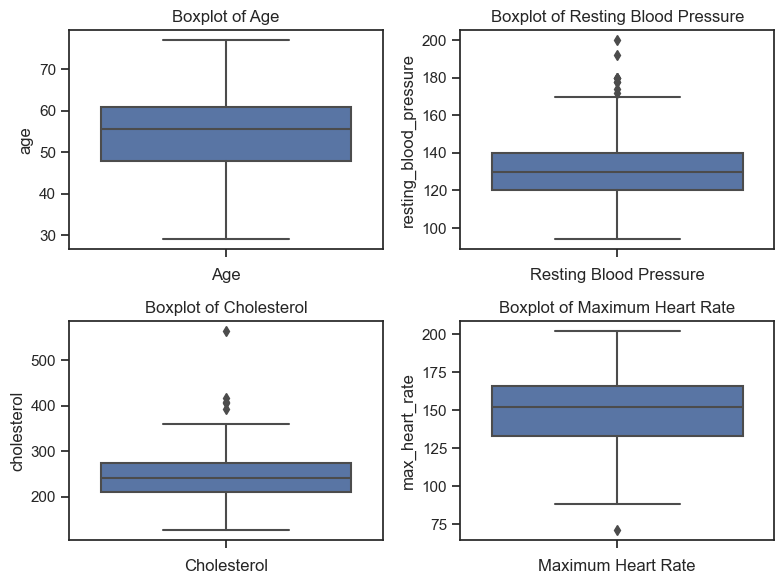

In [153]:
plt.figure(figsize=(8, 6))

# Create the first boxplot for 'age'
plt.subplot(221)
sns.boxplot(data=df, y='age')
plt.xlabel('Age')
plt.title('Boxplot of Age')

# Create the second boxplot for 'resting_bp'
plt.subplot(222)
sns.boxplot(data=df, y='resting_blood_pressure')
plt.xlabel('Resting Blood Pressure')
plt.title('Boxplot of Resting Blood Pressure')

# Create the third boxplot for 'cholesterol'
plt.subplot(223)
sns.boxplot(data=df, y='cholesterol')
plt.xlabel('Cholesterol')
plt.title('Boxplot of Cholesterol')

# Create the fourth boxplot for 'max_heart_rate'
plt.subplot(224)
sns.boxplot(data=df, y='max_heart_rate')
plt.xlabel('Maximum Heart Rate')
plt.title('Boxplot of Maximum Heart Rate')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Multivariate analysis

By analyzing the relationship between the discrete variables and the outcome, we can determine whether these variables can effectively differentiate or discriminate between different outcomes.

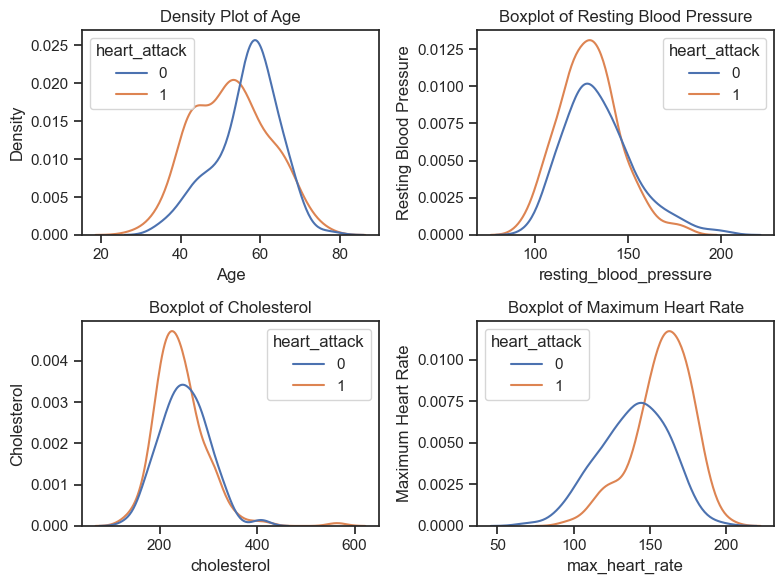

In [158]:
plt.figure(figsize=(8, 6))
plt.subplot(221)
sns.kdeplot(data=df, x='age', hue='heart_attack')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age')

# Create the second boxplot for 'resting_bp'
plt.subplot(222)
sns.kdeplot(data=df, x='resting_blood_pressure', hue="heart_attack")
plt.ylabel('Resting Blood Pressure')
plt.title('Boxplot of Resting Blood Pressure')

# Create the third boxplot for 'cholesterol'
plt.subplot(223)
sns.kdeplot(data=df, x='cholesterol', hue="heart_attack")
plt.ylabel('Cholesterol')
plt.title('Boxplot of Cholesterol')

# Create the fourth boxplot for 'max_heart_rate'
plt.subplot(224)
sns.kdeplot(data=df, x='max_heart_rate', hue="heart_attack")
plt.ylabel('Maximum Heart Rate')
plt.title('Boxplot of Maximum Heart Rate')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

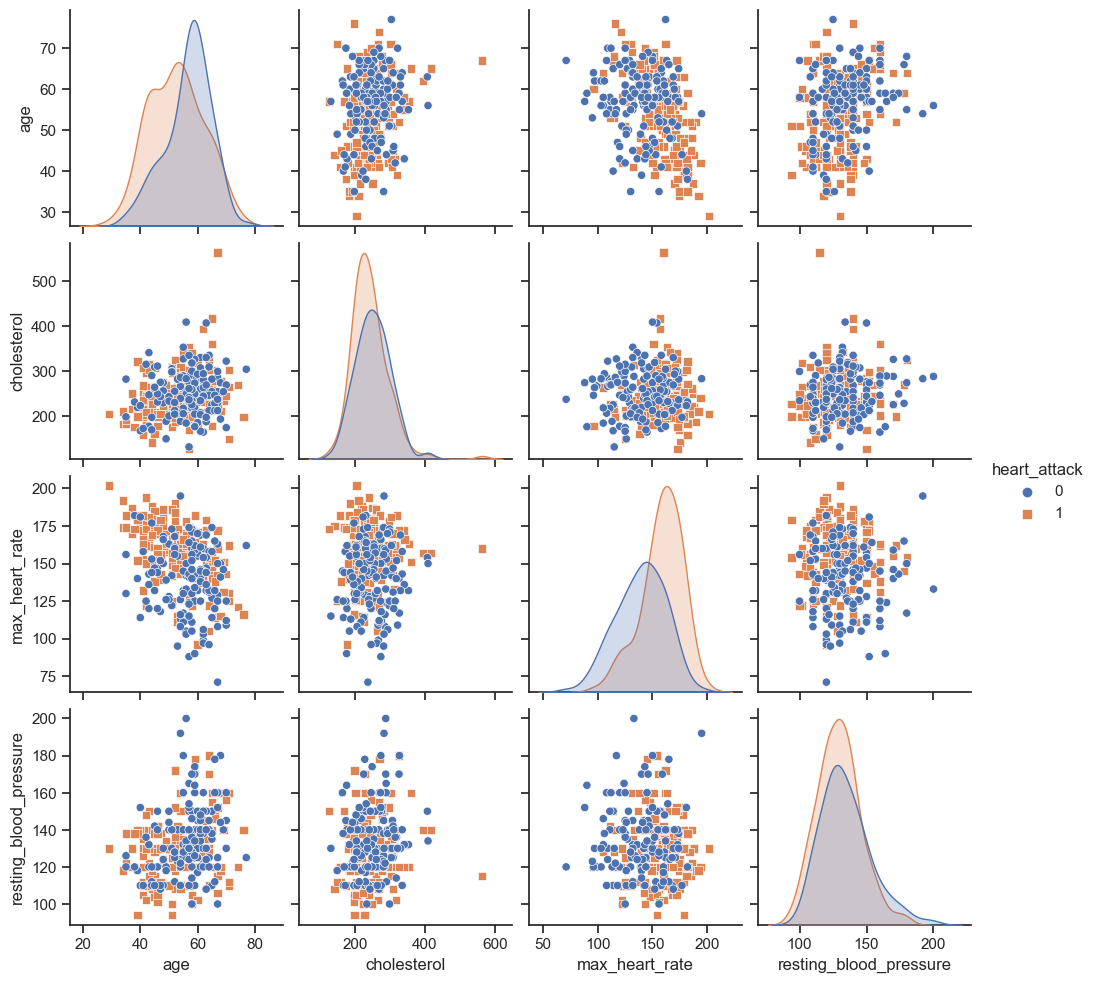

In [159]:
num_col = ["age", 'cholesterol', 'max_heart_rate', "resting_blood_pressure"]
sns.set_theme(style="ticks")
sns.pairplot(df, x_vars=num_col, y_vars = num_col, hue="heart_attack", markers=["o", "s"])

To test for independence between the outcome variable (heart attack: yes/no) and categorical variables, a statistical test such as the chi-square test of independence can be conducted. By comparing the observed frequencies with the expected frequencies under the assumption of independence, the test determines if the variables are dependent or independent of each other.

In [160]:
contingency_table = pd.crosstab(df['exercise_induced_angina'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: exercise_induced_angina vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: exercise_induced_angina vs heart_attack: 55.45620298199192
p-value: 9.556466486179178e-14


In [161]:
contingency_table = pd.crosstab(df['chest_pain_type'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: chest_pain_type vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: chest_pain_type vs heart_attack: 80.97876150785669
p-value: 1.8926838351935918e-17


In [162]:
contingency_table = pd.crosstab(df['sex'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: sex vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: sex vs heart_attack: 23.083879459669042
p-value: 1.5508552054949547e-06


In [163]:
contingency_table = pd.crosstab(df['fasting_blood_sugar>120'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: fasting_blood_sugar>120 vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: fasting_blood_sugar>120 vs heart_attack: 0.09240835568001494
p-value: 0.7611374700928197


In [164]:
contingency_table = pd.crosstab(df['resting_electrocardiographic_results'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: resting_electrocardiographic_results vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: resting_electrocardiographic_results vs heart_attack: 9.729682311241927
p-value: 0.007713053269318974


In [165]:
contingency_table = pd.crosstab(df['slope'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: slope vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: slope vs heart_attack: 46.889476601618135
p-value: 6.577782760917924e-11


In [166]:
contingency_table = pd.crosstab(df['n_major_vessels'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: n_major_vessels vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: n_major_vessels vs heart_attack: 73.68984583164412
p-value: 3.771038067427657e-15


In [167]:
contingency_table = pd.crosstab(df['Thalium_stress_test'], df['heart_attack'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
# Print the chi-square test statistic and p-value
print("Chi-square test statistic: Thalium_stress_test vs heart_attack:", chi2)
print("p-value:", p_value)

Chi-square test statistic: Thalium_stress_test vs heart_attack: 84.61031794685029
p-value: 3.146295138318122e-18


To examine the correlation between discrete variables in the dataset, the Pearson correlation coefficient was employed. The analysis revealed a low to moderate correlation among the variables, indicating the presence of some linear association. However, the strength of the relationship is not particularly strong.

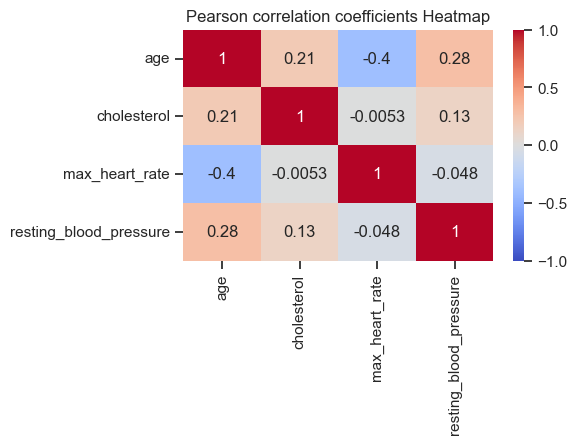

In [168]:
plt.figure(figsize=(5, 3))
variables = ["age", 'cholesterol', 'max_heart_rate', "resting_blood_pressure"]

# Calculate the correlation matrix
corr_matrix = df[variables].corr(method='pearson')

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson correlation coefficients Heatmap')
plt.show()

### Preprocessing training set
- standardization of discrete features (different scales, less affected by outliers, needed for SVM model)
- one-hot coding for categorical features

In [172]:
X = df.drop(columns = ["heart_attack"], axis = 1)
y = df["heart_attack"].copy()

In [173]:
categorical_cols = ['sex', "chest_pain_type", "fasting_blood_sugar>120", "resting_electrocardiographic_results", 
                    "exercise_induced_angina", "n_major_vessels", "Thalium_stress_test", "slope"]
numeric_cols = ["age", 'cholesterol', 'resting_blood_pressure', "max_heart_rate", "oldpeak"]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numeric_cols)],
    remainder='passthrough')

In [174]:
X_prep = preprocessor.fit_transform(X)

#### Selecting hyperparameters for SVC model using cross-validation and gridsearch

In [176]:
param_grid = [{"kernel": ["linear", "rbf"], "C": [1,100,1000], "gamma":[0.1, 5]}]

In [177]:
print(param_grid)

[{'kernel': ['linear', 'rbf'], 'C': [1, 100, 1000], 'gamma': [0.1, 5]}]


In [178]:
svc_models = SVC()

In [179]:
svc_models.fit(X,y)

SVC()

In [180]:
grid_search = GridSearchCV(svc_models, param_grid, cv=5, scoring = "accuracy")

In [181]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 100, 1000], 'gamma': [0.1, 5],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [182]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

#### Train SVC model with selected hyperparameters (C =1, gamm=0.1, kernel = linear)

In [183]:
svc_chosen = SVC(kernel = 'linear', gamma = 0.1, C =1)

In [184]:
svc_fit = svc_chosen.fit(X_prep,y)

In [185]:
crossval_pred = cross_val_predict(svc_fit, X_prep, y, cv=3)

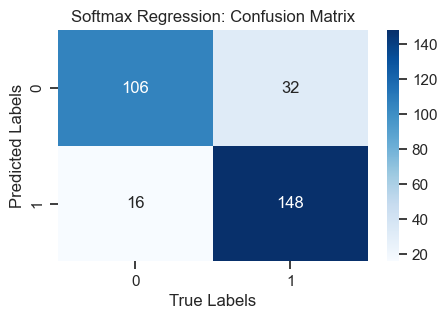

In [186]:
cm = confusion_matrix(y, crossval_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
plt.title('Softmax Regression: Confusion Matrix')
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show()

In [187]:
print(classification_report(y, crossval_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       138
           1       0.82      0.90      0.86       164

    accuracy                           0.84       302
   macro avg       0.85      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



An accuracy of 84% for a model means that it correctly predicts the outcome or class label for 84% of the instances in the dataset. 

#### Training a classification tree was traind as an alternative model for comparison

In [192]:
tree_clf = DecisionTreeClassifier().fit(X, y)

In [193]:
crossval_pred_tree = cross_val_predict(tree_clf, X_prep, y, cv=3)

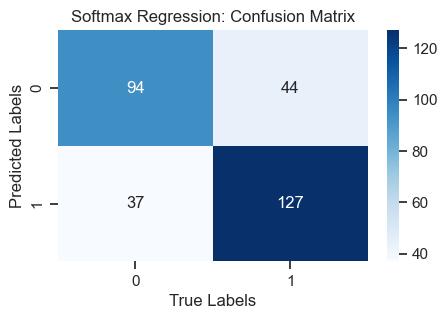

In [194]:
cm = confusion_matrix(y, crossval_pred_tree)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
plt.title('Softmax Regression: Confusion Matrix')
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')
plt.show()

In [195]:
# accuracy of the model is 73%
print(classification_report(y, crossval_pred_tree))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       138
           1       0.74      0.77      0.76       164

    accuracy                           0.73       302
   macro avg       0.73      0.73      0.73       302
weighted avg       0.73      0.73      0.73       302

